In [69]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

data=pd.read_csv("project.csv" )
columns_to_keep = ['year','f']
df = data[columns_to_keep]
df['year'] = pd.to_datetime(df['year'])
df.set_index('year', inplace=True)

tss = TimeSeriesSplit(n_splits = 2)

X = df.drop(labels=[], axis=1)
y = df['f']
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


f_columns = ['f' ]

f_transformer = MinMaxScaler()
t_transformer = MinMaxScaler()

f_transformer = f_transformer.fit(X_train[f_columns].to_numpy())
t_transformer = t_transformer.fit(y_train.to_numpy().reshape(-1, 1))

X_train.loc[:, f_columns] = f_transformer.transform(X_train[f_columns].to_numpy())
y_train = t_transformer.transform(y_train.to_numpy().reshape(-1, 1))

X_test.loc[:, f_columns] = f_transformer.transform(X_test[f_columns].to_numpy())
y_test = t_transformer.transform(y_test.to_numpy().reshape(-1, 1))
import numpy as np

def create_dataset(X, y, time_steps=1, future_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps - future_steps + 1):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps:i + time_steps + future_steps])
    return np.array(Xs), np.array(ys)

time_steps = 3
future_steps = 10

X_train, y_train = create_dataset(X_train, y_train, time_steps, future_steps)
X_test, y_test = create_dataset(X_test, y_test, time_steps, future_steps)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(30, 3, 1) (30, 10, 1) (9, 3, 1) (9, 10, 1)


<ipython-input-69-476910dba817>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_datetime(df['year'])
<ipython-input-69-476910dba817>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, f_columns] = f_transformer.transform(X_train[f_columns].to_numpy())
<ipython-input-69-476910dba817>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, 

In [70]:
import math
from tensorflow import keras
from keras import layers , models
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD, RMSprop


In [71]:
def build_model(num_layers, units, dropout_rates):
    model = models.Sequential()

    for i in range(num_layers):
        return_sequences = (i != num_layers - 1)
        model.add(layers.LSTM(units=units[i],
                              input_shape=(X_train.shape[1], X_train.shape[2]),
                              return_sequences=return_sequences))
        model.add(layers.Dropout(dropout_rates[i]))

    model.add(layers.Dense(10))  # Assuming the output layer size is intended as 10
    optimizer = Adam(learning_rate=0.022194346804453067)
    model.compile( optimizer=optimizer,
                      loss='mean_squared_error' )
    return model


In [72]:
num_layers = 2
units = [151, 126]
dropout_rates = [0.4984999889218471, 0.3617136820775737  ]

model = build_model(num_layers, units, dropout_rates)
custom_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=40,
    min_delta=0.01,
    verbose=1,
    restore_best_weights=True ,
    start_from_epoch=40)

history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=32,
    validation_split=0.2
   ,callbacks=[custom_early_stopping]
   )




Epoch 1/300
1/1 [==============================] - 6s 6s/step - loss: 0.3092 - val_loss: 0.0120
Epoch 2/300
1/1 [==============================] - 0s 45ms/step - loss: 0.1513 - val_loss: 1.8306
Epoch 3/300
1/1 [==============================] - 0s 49ms/step - loss: 1.7397 - val_loss: 0.0470
Epoch 4/300
1/1 [==============================] - 0s 49ms/step - loss: 0.1150 - val_loss: 0.0199
Epoch 5/300
1/1 [==============================] - 0s 48ms/step - loss: 0.2338 - val_loss: 0.0219
Epoch 6/300
1/1 [==============================] - 0s 60ms/step - loss: 0.2362 - val_loss: 0.0221
Epoch 7/300
1/1 [==============================] - 0s 47ms/step - loss: 0.2054 - val_loss: 0.0323
Epoch 8/300
1/1 [==============================] - 0s 48ms/step - loss: 0.1687 - val_loss: 0.0710
Epoch 9/300
1/1 [==============================] - 0s 48ms/step - loss: 0.1246 - val_loss: 0.1658
Epoch 10/300
1/1 [==============================] - 0s 46ms/step - loss: 0.1039 - val_loss: 0.2089
Epoch 11/300
1/1 [===

dict_keys(['loss', 'val_loss'])


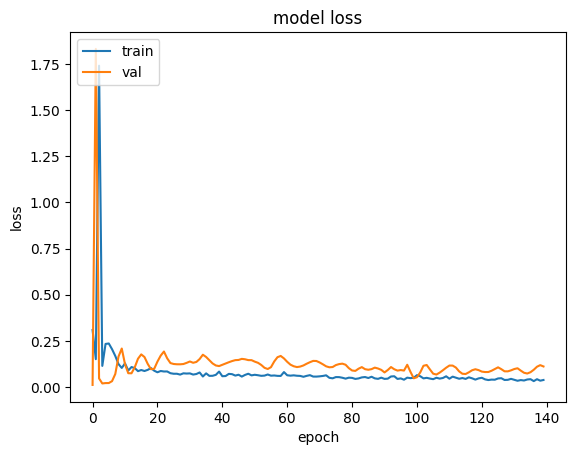

In [73]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')



In [74]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
import numpy as np


y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)


1/1 [==============================] - 0s 43ms/step


In [75]:

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate MAPE avoiding division by zero"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    if np.any(non_zero_mask):
        return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100
    else:
        return np.nan

mses, rmses, maes, r2s, mapes = [], [], [], [], []

for i in range(y_test.shape[1]):
    actual_step = y_test[:, i]
    predicted_step = y_pred[:, i]

    actual_inv = t_transformer.inverse_transform(actual_step.reshape(-1, 1))
    predicted_inv = t_transformer.inverse_transform(predicted_step.reshape(-1, 1))

    mse = mean_squared_error(actual_inv, predicted_inv)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual_inv, predicted_inv)
    r2 = r2_score(actual_inv, predicted_inv)
    mape = mean_absolute_percentage_error(actual_inv, predicted_inv)

    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)
    r2s.append(r2)
    mapes.append(mape)

for step_index in range(len(mses)):
    print(f"Metrics for t+{step_index+1}:")
    print(f"  MSE: {mses[step_index]:.3f}")
    print(f"  RMSE: {rmses[step_index]:.3f}")
    print(f"  MAE: {maes[step_index]:.3f}")
    print(f"  R2: {r2s[step_index]:.3f}")
    print(f"  MAPE: {mapes[step_index]:.2f}%")
    print("----------")


Metrics for t+1:
  MSE: 5.675
  RMSE: 2.382
  MAE: 2.141
  R2: -1.168
  MAPE: 14.15%
----------
Metrics for t+2:
  MSE: 6.262
  RMSE: 2.502
  MAE: 1.999
  R2: -2.031
  MAPE: 12.73%
----------
Metrics for t+3:
  MSE: 12.019
  RMSE: 3.467
  MAE: 2.647
  R2: -1.960
  MAPE: 18.57%
----------
Metrics for t+4:
  MSE: 17.421
  RMSE: 4.174
  MAE: 3.353
  R2: -1.351
  MAPE: 26.07%
----------
Metrics for t+5:
  MSE: 15.791
  RMSE: 3.974
  MAE: 3.647
  R2: -0.968
  MAPE: 27.80%
----------
Metrics for t+6:
  MSE: 13.881
  RMSE: 3.726
  MAE: 3.445
  R2: -0.685
  MAPE: 24.80%
----------
Metrics for t+7:
  MSE: 8.713
  RMSE: 2.952
  MAE: 2.597
  R2: -0.024
  MAPE: 18.13%
----------
Metrics for t+8:
  MSE: 4.418
  RMSE: 2.102
  MAE: 1.720
  R2: 0.514
  MAPE: 14.20%
----------
Metrics for t+9:
  MSE: 2.023
  RMSE: 1.422
  MAE: 1.225
  R2: 0.676
  MAPE: 11.02%
----------
Metrics for t+10:
  MSE: 8.114
  RMSE: 2.849
  MAE: 2.284
  R2: -0.487
  MAPE: 19.28%
----------


In [76]:

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate MAPE avoiding division by zero"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    if np.any(non_zero_mask):
        return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100
    else:
        return np.nan

train_mses, train_rmses, train_maes, train_r2s, train_mapes = [], [], [], [], []

# Calculate metrics for each forecast step on training data
for i in range(y_train.shape[1]):
    actual_step = y_train[:, i]
    predicted_step = y_pred_train[:, i]

    actual_inv = t_transformer.inverse_transform(actual_step.reshape(-1, 1))
    predicted_inv = t_transformer.inverse_transform(predicted_step.reshape(-1, 1))

    mse = mean_squared_error(actual_inv, predicted_inv)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual_inv, predicted_inv)
    r2 = r2_score(actual_inv, predicted_inv)
    mape = mean_absolute_percentage_error(actual_inv, predicted_inv)

    train_mses.append(mse)
    train_rmses.append(rmse)
    train_maes.append(mae)
    train_r2s.append(r2)
    train_mapes.append(mape)

for step_index in range(len(train_mses)):
    print(f"Train Metrics for t+{step_index+1}:")
    print(f"  MSE: {train_mses[step_index]:.3f}")
    print(f"  RMSE: {train_rmses[step_index]:.3f}")
    print(f"  MAE: {train_maes[step_index]:.3f}")
    print(f"  R2: {train_r2s[step_index]:.3f}")
    print(f"  MAPE: {train_mapes[step_index]:.2f}%")
    print("----------")


Train Metrics for t+1:
  MSE: 11.487
  RMSE: 3.389
  MAE: 2.377
  R2: 0.571
  MAPE: 17.46%
----------
Train Metrics for t+2:
  MSE: 13.921
  RMSE: 3.731
  MAE: 2.657
  R2: 0.490
  MAPE: 18.04%
----------
Train Metrics for t+3:
  MSE: 15.898
  RMSE: 3.987
  MAE: 2.953
  R2: 0.437
  MAPE: 19.93%
----------
Train Metrics for t+4:
  MSE: 18.369
  RMSE: 4.286
  MAE: 3.495
  R2: 0.370
  MAPE: 25.05%
----------
Train Metrics for t+5:
  MSE: 21.053
  RMSE: 4.588
  MAE: 3.655
  R2: 0.283
  MAPE: 25.41%
----------
Train Metrics for t+6:
  MSE: 22.337
  RMSE: 4.726
  MAE: 3.705
  R2: 0.246
  MAPE: 26.49%
----------
Train Metrics for t+7:
  MSE: 22.180
  RMSE: 4.710
  MAE: 3.735
  R2: 0.275
  MAPE: 26.80%
----------
Train Metrics for t+8:
  MSE: 17.674
  RMSE: 4.204
  MAE: 3.456
  R2: 0.429
  MAPE: 26.40%
----------
Train Metrics for t+9:
  MSE: 15.047
  RMSE: 3.879
  MAE: 3.122
  R2: 0.507
  MAPE: 24.14%
----------
Train Metrics for t+10:
  MSE: 13.264
  RMSE: 3.642
  MAE: 2.934
  R2: 0.567
  MAP

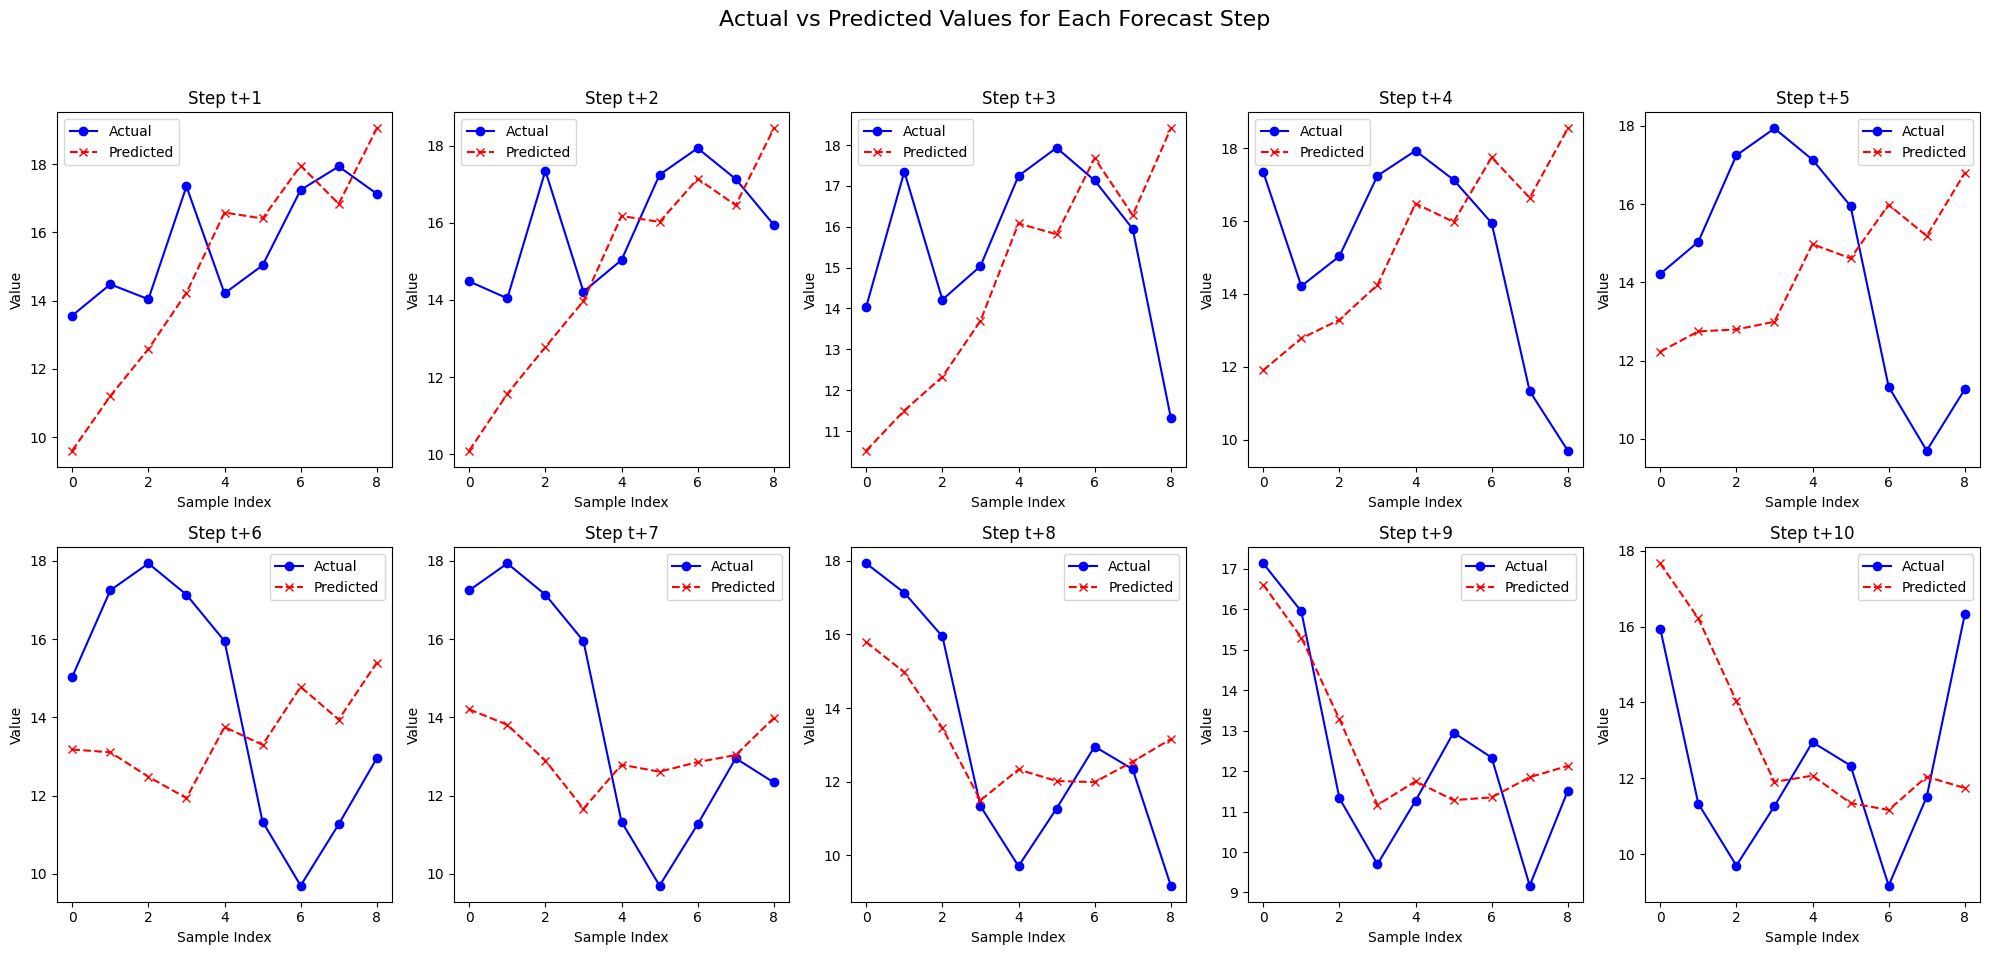

In [77]:

num_steps = 10

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.suptitle('Actual vs Predicted Values for Each Forecast Step', fontsize=16)

axes = axes.flatten()

for i in range(num_steps):
    actual_inv = t_transformer.inverse_transform(y_test[:, i].reshape(-1, 1))
    predicted_inv = t_transformer.inverse_transform(y_pred[:, i].reshape(-1, 1))

    # Plotting
    axes[i].plot(actual_inv, label='Actual', marker='o', color='blue')
    axes[i].plot(predicted_inv, label='Predicted', marker='x', linestyle='--', color='red')
    axes[i].set_title(f'Step t+{i+1}')
    axes[i].set_xlabel('Sample Index')
    axes[i].set_ylabel('Value')
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [78]:
y_train_inv = t_transformer.inverse_transform(y_train.reshape(1, -1))
y_pred_train_inv = t_transformer.inverse_transform(y_pred_train)
y_test_flattened = y_test.reshape(-1, 1)
y_pred_flattened = y_pred.reshape(-1, 1)  #
y_test_inv = t_transformer.inverse_transform(y_test_flattened)
y_pred_inv = t_transformer.inverse_transform(y_pred_flattened)

In [83]:
# calculate RMSE
rmse = sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print('Test RMSE: %.9f' % rmse)


# calculate MAE
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(y_test_inv, y_pred_inv)
print('Test MAE: %.9f' % mae)


# calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
mape= mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print('Test MAPE: %.9f' % mape)

# calculate NRMSE
actual_test=y_test_inv
Nrmse_test=rmse /(actual_test.max() - actual_test.min())
print('Test NRMSE: %.9f' % Nrmse_test)


from sklearn.metrics import r2_score
r2 = r2_score(y_test_inv, y_pred_inv)
print('R2 score: %.9f' % r2)


Test RMSE: 3.071106627
Test MAE: 2.505827942
Test MAPE: 0.186759836
Test NRMSE: 0.350513063
R2 score: -0.210762288


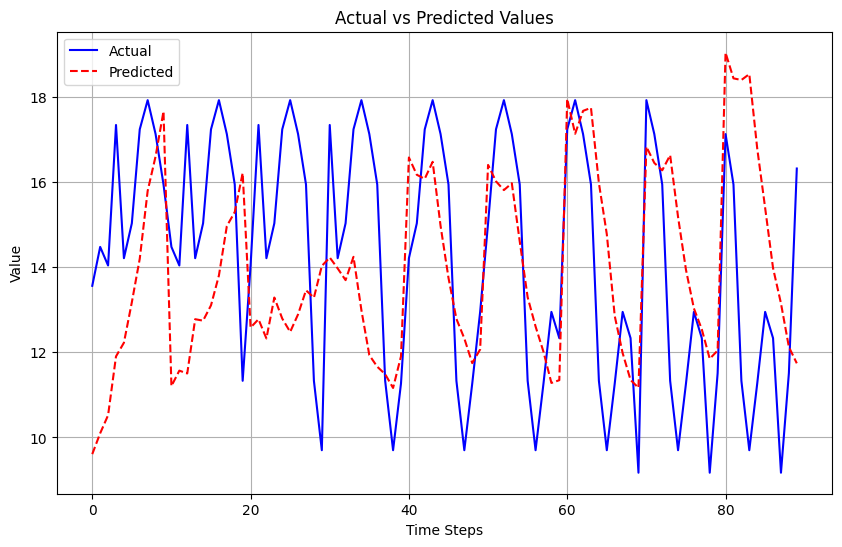

In [80]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual', color='blue')
plt.plot(y_pred_inv, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


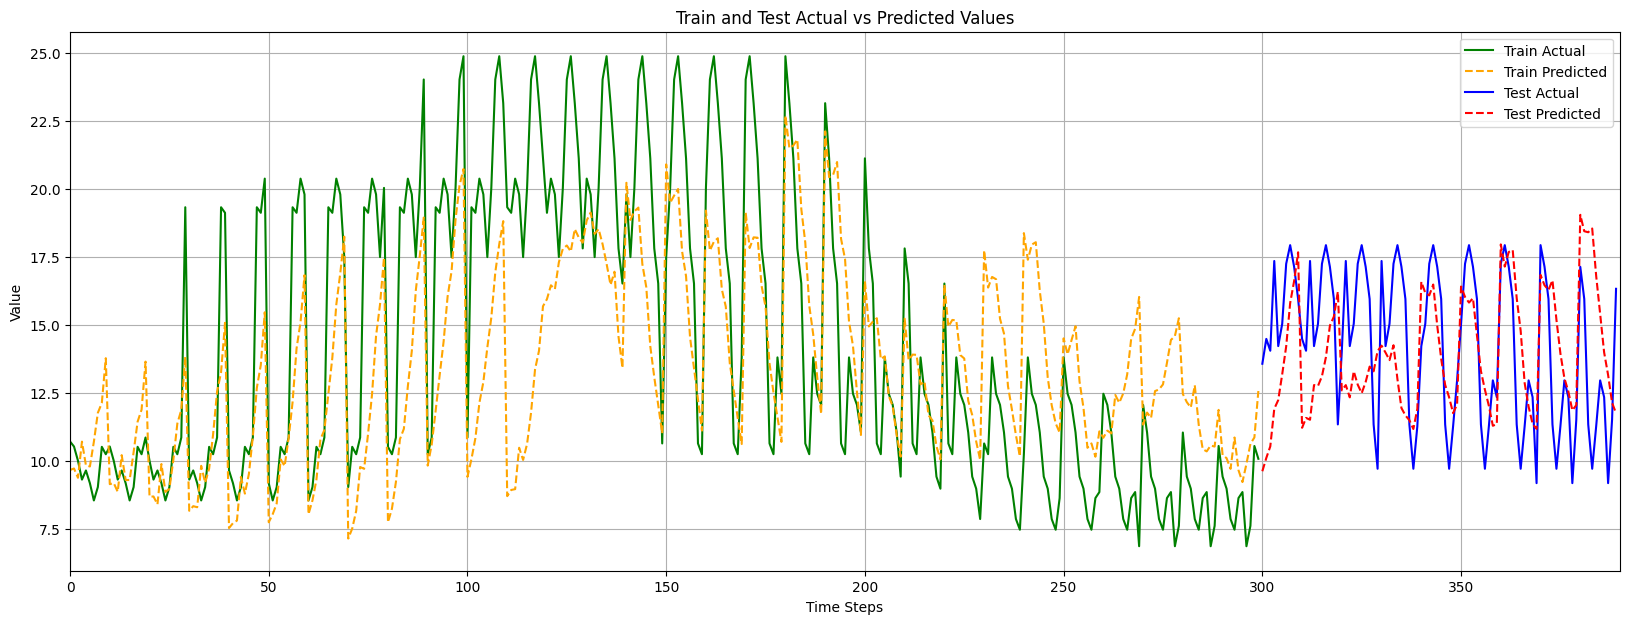

In [81]:


#
y_train_inv = y_train_inv.reshape(-1)
y_test_inv = y_test_inv.reshape(-1)
y_pred_train_inv = y_pred_train_inv.reshape(-1)
full_actual = np.concatenate((y_train_inv, y_test_inv))
train_index = range(len(y_train_inv))
test_index = range(len(y_train_inv), len(y_train_inv) + len(y_test_inv))
plt.figure(figsize=(20, 7))
plt.plot(train_index, y_train_inv, label='Train Actual', color='green')
plt.plot(train_index, y_pred_train_inv, label='Train Predicted', color='orange', linestyle='--')
plt.plot(test_index, y_test_inv, label='Test Actual', color='blue')
plt.plot(test_index, y_pred_inv, label='Test Predicted', color='red', linestyle='--')
plt.title('Train and Test Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xlim([0, len(full_actual)])
plt.show()


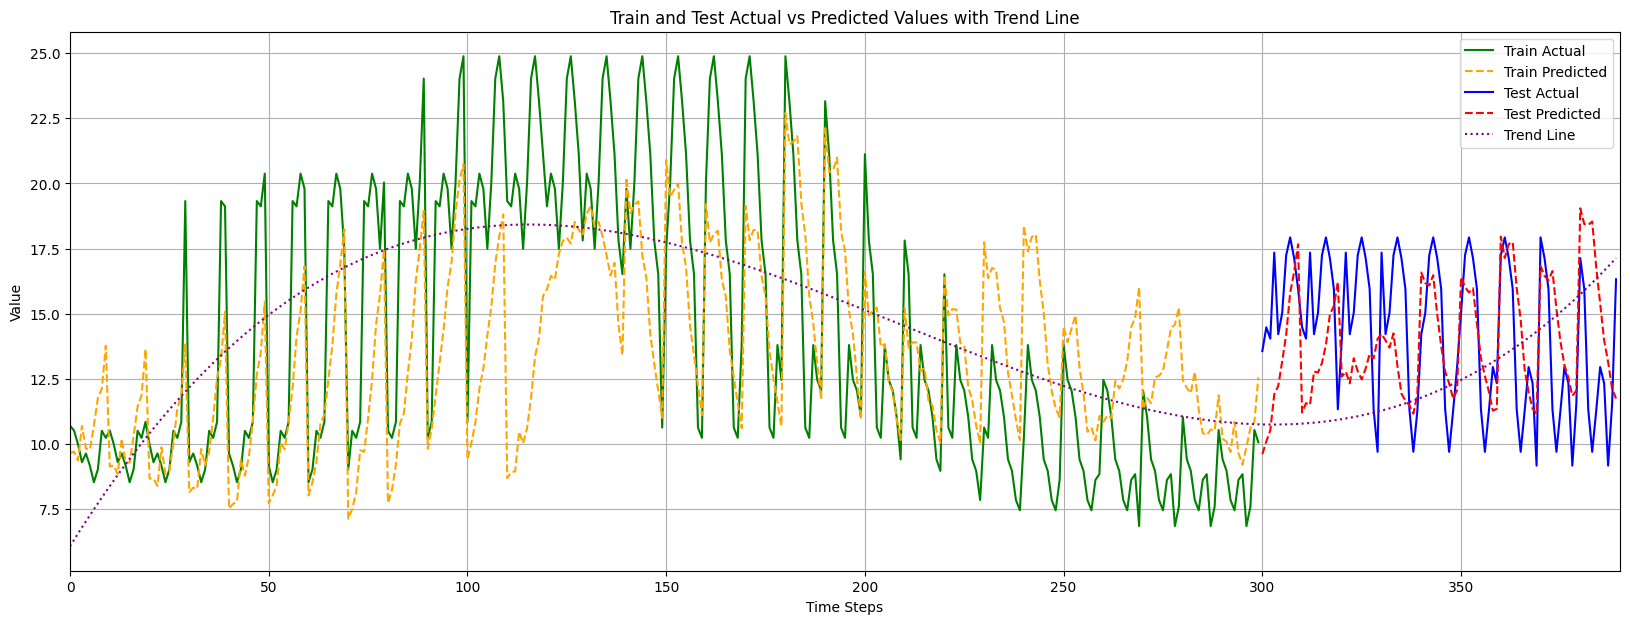

In [82]:



full_index = np.arange(len(full_actual))
coefficients = np.polyfit(full_index, full_actual, 3)
polynomial = np.poly1d(coefficients)
trend_line = polynomial(full_index)
plt.figure(figsize=(20, 7))
plt.plot(train_index, y_train_inv, label='Train Actual', color='green')
plt.plot(train_index, y_pred_train_inv, label='Train Predicted', color='orange', linestyle='--')
plt.plot(test_index, y_test_inv, label='Test Actual', color='blue')
plt.plot(test_index, y_pred_inv, label='Test Predicted', color='red', linestyle='--')
plt.plot(full_index, trend_line, label='Trend Line', color='purple', linestyle=':')
plt.title('Train and Test Actual vs Predicted Values with Trend Line')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xlim([0, len(full_actual)])
plt.show()
